In [69]:
#installing top2vec
!pip install top2vec[sentence_encoders]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#check the data path
!ls drive/MyDrive/CANIS


DataSet_Misinfo_FAKE.csv  DataSet_Misinfo_TRUE.csv


In [ ]:
# reading the csv files for the true and fake datasets
df_misinfo = pd.read_csv('drive/MyDrive/CANIS/DataSet_Misinfo_FAKE.csv')
df_trueinfo = pd.read_csv('drive/MyDrive/CANIS/DataSet_Misinfo_TRUE.csv')

In [ ]:
# Convert non-string data to strings
df_misinfo['text'] = df_misinfo['text'].apply(lambda x: str(x) if type(x) != str else x)
df_trueinfo['text'] = df_trueinfo['text'].apply(lambda x: str(x) if type(x) != str else x)

# Remove rows with missing values
df_misinfo = df_misinfo.dropna(subset=['text'])
df_trueinfo = df_trueinfo.dropna(subset=['text'])

In [85]:
import pandas as pd

# Check the number of rows in the DataFrame
num_rows = df_misinfo.shape[0]

print(f"The number of rows in the dataset is {num_rows}.")


The number of rows in the dataset is 43642.


In [ ]:
df_misinfo.head()


Unnamed: 0                                               text
0           0  Donald Trump just couldn t wish all Americans ...
1           1  House Intelligence Committee Chairman Devin Nu...
2           2  On Friday, it was revealed that former Milwauk...
3           3  On Christmas day, Donald Trump announced that ...
4           4  Pope Francis used his annual Christmas Day mes...

In [ ]:
df_trueinfo.head()

Unnamed: 0                                               text
0           0  The head of a conservative Republican faction ...
1           1  Transgender people will be allowed for the fir...
2           2  The special counsel investigation of links bet...
3           3  Trump campaign adviser George Papadopoulos tol...
4           4  President Donald Trump called on the U.S. Post...

In [86]:
# daatset into lists for top2vec
fake = df_misinfo['text'].tolist()
true = df_trueinfo['text'].tolist()

print(len(fake))

43642


In [ ]:
from top2vec import Top2Vec

model_fake = Top2Vec(fake, workers=4, embedding_model='universal-sentence-encoder')

2023-04-02 20:21:41,111 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-04-02 20:22:20,064 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-04-02 20:22:46,180 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-04-02 20:24:00,544 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-04-02 20:24:41,604 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-04-02 20:24:43,790 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
from top2vec import Top2Vec

model_true = Top2Vec(true, workers=4, embedding_model='universal-sentence-encoder')

2023-04-02 20:25:01,325 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-04-02 20:25:45,450 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-04-02 20:25:49,659 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-04-02 20:26:52,155 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-04-02 20:27:11,343 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-04-02 20:27:12,161 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
print(model_fake.get_num_topics())
print(model_true.get_num_topics())

374
311


In [ ]:
fake_size, fake_nums = model_fake.get_topic_sizes()
true_size, true_nums = model_true.get_topic_sizes()

In [ ]:
fake_size

array([1058,  754,  652,  618,  549,  548,  517,  497,  471,  439,  421,
        416,  404,  372,  365,  364,  360,  350,  347,  340,  336,  325,
        322,  321,  306,  296,  294,  293,  288,  285,  279,  273,  269,
        263,  262,  261,  259,  256,  252,  231,  231,  230,  229,  224,
        220,  217,  217,  216,  215,  214,  211,  210,  207,  206,  205,
        202,  201,  197,  196,  194,  193,  189,  187,  185,  183,  180,
        177,  177,  172,  171,  163,  163,  162,  162,  158,  157,  156,
        156,  155,  154,  152,  151,  149,  149,  149,  146,  145,  143,
        142,  142,  142,  141,  138,  138,  137,  136,  135,  134,  134,
        134,  133,  133,  133,  132,  132,  130,  126,  123,  122,  122,
        121,  120,  120,  119,  119,  118,  118,  117,  115,  115,  115,
        114,  113,  112,  111,  110,  109,  109,  106,  106,  105,  105,
        105,  104,  104,  104,  104,  100,   99,   99,   98,   97,   97,
         96,   95,   95,   95,   94,   93,   93,   

In [ ]:
true_size

array([901, 771, 747, 569, 498, 449, 428, 365, 361, 355, 352, 345, 333,
       322, 312, 311, 292, 281, 268, 267, 258, 256, 254, 247, 247, 239,
       239, 233, 233, 228, 228, 225, 222, 217, 214, 211, 210, 208, 205,
       204, 196, 195, 195, 192, 191, 191, 191, 188, 187, 187, 182, 174,
       169, 167, 167, 164, 164, 156, 153, 150, 148, 148, 145, 145, 143,
       141, 141, 139, 138, 138, 137, 136, 136, 135, 134, 134, 131, 130,
       129, 128, 127, 127, 126, 126, 125, 125, 125, 124, 123, 123, 122,
       122, 120, 120, 120, 119, 118, 117, 116, 116, 116, 115, 115, 114,
       113, 112, 111, 110, 109, 109, 108, 107, 104, 104, 102, 101, 101,
        97,  97,  96,  95,  94,  94,  94,  94,  94,  93,  93,  92,  92,
        92,  91,  91,  90,  89,  89,  89,  89,  89,  88,  87,  87,  87,
        86,  85,  84,  84,  83,  82,  82,  81,  81,  80,  80,  80,  79,
        79,  78,  78,  78,  77,  76,  75,  75,  75,  75,  75,  74,  74,
        73,  72,  72,  71,  71,  71,  70,  70,  70,  69,  68,  6

In [ ]:
model_fake.topic_words

array([['ukraine', 'ukrainians', 'ukrainian', ..., 'belarusian',
        'moscow', 'soviet'],
       ['trump', 'trumps', 'trumpers', ..., 'snl', 'politicized',
        'huffpost'],
       ['protestors', 'protester', 'protesters', ..., 'kellyanne',
        'assaulting', 'indictments'],
       ...,
       ['puede', 'todos', 'otro', ..., 'hace', 'werden', 'saa'],
       ['indians', 'fivethirtyeight', 'pollster', ..., 'villanueva',
        'mcgovern', 'recounts'],
       ['notify', 'emails', 'mails', ..., 'npr', 'reactors', 'including']],
      dtype='<U15')

In [ ]:
model_true.topic_words

array([['dprk', 'thaad', 'pyongyang', ..., 'dictator', 'comey', 'zheng'],
       ['obamacare', 'cbo', 'repeal', ..., 'chafee', 'gillibrand',
        'gridlock'],
       ['kasich', 'favorability', 'mcmullin', ..., 'presidential',
        'gowdy', 'pollsters'],
       ...,
       ['airbags', 'automakers', 'airbag', ..., 'manufacturer', 'warned',
        'insurance'],
       ['candidates', 'election', 'elections', ..., 'gop', 'sanders',
        'toomey'],
       ['pkk', 'kurds', 'kurdish', ..., 'allahu', 'ghouta', 'sarin']],
      dtype='<U15')

In [ ]:
model_fake.topic_words[0]

array(['ukraine', 'ukrainians', 'ukrainian', 'poroshenko', 'crimea',
       'maidan', 'donetsk', 'kyiv', 'kiev', 'crimean', 'donbass',
       'separatists', 'baltics', 'belarus', 'putin', 'kaliningrad',
       'yanukovych', 'kremlin', 'lavrov', 'separatist', 'minsk', 'russia',
       'ossetia', 'medvedev', 'odessa', 'sevastopol', 'russians',
       'russophobia', 'russian', 'russie', 'rubles', 'baltic', 'rusia',
       'yeltsin', 'annexation', 'ceasefire', 'geopolitical', 'pravda',
       'oligarchs', 'sergei', 'siberia', 'donbas', 'geopolitics',
       'nationalists', 'estonia', 'vladimir', 'gorbachev', 'belarusian',
       'moscow', 'soviet'], dtype='<U15')

In [ ]:
model_true.topic_words[0]

array(['dprk', 'thaad', 'pyongyang', 'icbm', 'kim', 'tillerson',
       'medvedev', 'xinhua', 'lavrov', 'diplomacy', 'sanctions',
       'macarthur', 'jong', 'briefings', 'mattis', 'seoul', 'jinping',
       'bluster', 'missiles', 'apec', 'detente', 'reunification',
       'tweeting', 'spicer', 'diplomatic', 'diplomat', 'deterrence',
       'koreans', 'missile', 'sanction', 'korea', 'warhead', 'diplomats',
       'china', 'nuclear', 'trump', 'warheads', 'briefing', 'reuters',
       'iaea', 'dictatorship', 'negotiators', 'hawkish', 'embargo',
       'putin', 'dictators', 'disarmament', 'dictator', 'comey', 'zheng'],
      dtype='<U15')

In [ ]:
ftopic_words, fword_scores, ftopic_nums = model_fake.get_topics(model_fake.get_num_topics())
for words, scores, nums in zip(ftopic_words, fword_scores, ftopic_nums):
  print("Topic Number: ",nums)
  print(f"Words: {words}")
  print("\n")

Topic Number:  0
Words: ['ukraine' 'ukrainians' 'ukrainian' 'poroshenko' 'crimea' 'maidan'
 'donetsk' 'kyiv' 'kiev' 'crimean' 'donbass' 'separatists' 'baltics'
 'belarus' 'putin' 'kaliningrad' 'yanukovych' 'kremlin' 'lavrov'
 'separatist' 'minsk' 'russia' 'ossetia' 'medvedev' 'odessa' 'sevastopol'
 'russians' 'russophobia' 'russian' 'russie' 'rubles' 'baltic' 'rusia'
 'yeltsin' 'annexation' 'ceasefire' 'geopolitical' 'pravda' 'oligarchs'
 'sergei' 'siberia' 'donbas' 'geopolitics' 'nationalists' 'estonia'
 'vladimir' 'gorbachev' 'belarusian' 'moscow' 'soviet']


Topic Number:  1
Words: ['trump' 'trumps' 'trumpers' 'tweeting' 'potus' 'bigly' 'donald' 'yuge'
 'kellyanne' 'demagogue' 'priebus' 'presidential' 'deplorables'
 'nevertrump' 'killary' 'retweets' 'omarosa' 'flotus' 'reince' 'spicer'
 'melania' 'inauguration' 'maga' 'trumped' 'lauer' 'tweets' 'retweeted'
 'cernovich' 'snowflakes' 'corker' 'krauthammer' 'scalise' 'bluster'
 'fivethirtyeight' 'ingraham' 'deplorable' 'politico' 'birt

In [ ]:
ttopic_words, tword_scores, ttopic_nums = model_true.get_topics(model_true.get_num_topics())
for words, scores, nums in zip(ttopic_words, tword_scores, ttopic_nums):
  print("Topic Number: ",nums)
  print(f"Words: {words}")
  print("\n")

Topic Number:  0
Words: ['dprk' 'thaad' 'pyongyang' 'icbm' 'kim' 'tillerson' 'medvedev' 'xinhua'
 'lavrov' 'diplomacy' 'sanctions' 'macarthur' 'jong' 'briefings' 'mattis'
 'seoul' 'jinping' 'bluster' 'missiles' 'apec' 'detente' 'reunification'
 'tweeting' 'spicer' 'diplomatic' 'diplomat' 'deterrence' 'koreans'
 'missile' 'sanction' 'korea' 'warhead' 'diplomats' 'china' 'nuclear'
 'trump' 'warheads' 'briefing' 'reuters' 'iaea' 'dictatorship'
 'negotiators' 'hawkish' 'embargo' 'putin' 'dictators' 'disarmament'
 'dictator' 'comey' 'zheng']


Topic Number:  1
Words: ['obamacare' 'cbo' 'repeal' 'repealing' 'ahca' 'aca' 'murkowski'
 'mcconnell' 'chaffetz' 'bipartisan' 'gop' 'boehner' 'grassley'
 'filibuster' 'manchin' 'toomey' 'nonpartisan' 'insurers' 'republicans'
 'corker' 'partisanship' 'senate' 'scalise' 'sasse' 'aetna' 'krauthammer'
 'congressmen' 'congressional' 'uninsured' 'repealed' 'reince' 'wyden'
 'dems' 'healthcare' 'gowdy' 'gorsuch' 'fisa' 'constituents' 'lawmakers'
 'incumbents

In [74]:
model_fake.save("drive/MyDrive/CANIS/fake_output_file.bin")

In [75]:
model_true.save("drive/MyDrive/CANIS/true_output_file.bin")

In [76]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def get_generic_name(words_list):
    # Remove stop words and tokenize words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words_list if word.lower() not in stop_words]
    words = word_tokenize(" ".join(words))
    
    # Perform lemmatization on words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Identify common themes or concepts using frequency distribution
    freq_dist = nltk.FreqDist(words)
    most_common_words = freq_dist.most_common(3)  # Get top 3 most common words
    generic_name = " ".join([word[0] for word in most_common_words])
    
    return generic_name

In [77]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [80]:
f = model_fake.get_num_topics()
t = model_true.get_num_topics()

In [81]:
faketopics_list = []
for i in range(0, f):
  #print(get_generic_name(model_fake.topic_words[i]))
  faketopics_list.append(get_generic_name(model_fake.topic_words[i]))
print(faketopics_list)
print(len(faketopics_list))

['trump clinton oligarch', 'trump supremacist racist', 'indictment investigation clinton', 'ukrainian baltic separatist', 'trump leaker oligarch', 'trump trumpers potus', 'obamacare cbo repeal', 'protester protest rally', 'trump republican nevertrump', 'baltic warmonger soviet', 'russian soviet ukrainian', 'policeman sheriff cop', 'syrian jihadist bombing', 'protester blm sharpton', 'campus protester racist', 'trump propagandist trumpers', 'ukrainian baltic separatist', 'ballot precinct recount', 'trump clinton lauer', 'pollster trump clinton', 'ukrainian separatist donbas', 'jihadist islamist trump', 'economist banker hyperinflation', 'caucus clinton sander', 'comey chaffetz gowdy', 'marxist democracy dictatorship', 'shooting gunman gun', 'antioxidant vitamin supplement', 'energy illusion meditation', 'trump pollster clinton', 'protest protester boycott', 'denier hoax scientist', 'protester pipeline protest', 'trump tweet leaker', 'clinton staffer leaker', 'israeli zionist palestinian

In [82]:
truetopics_list = []
for i in range(0, t):
  #print(get_generic_name(model_true.topic_words[i]))
  truetopics_list.append(get_generic_name(model_true.topic_words[i]))
print(truetopics_list)

['obamacare cbo repeal', 'briefing sanction trump', 'palestinian israeli netanyahu', 'terrorist jihadist gunman', 'cbo repealing boehner', 'clinton caucus pollster', 'iranian sanction accord', 'refugee trump islamist', 'catalan separatist catalonia', 'appointee gorsuch scalia', 'negotiation negotiator agreement', 'ngo rohingya myanmar', 'politicized lauer overblown', 'trump debate clinton', 'banker deregulation grassley', 'trump comey chaffetz', 'trump russian putin', 'iraqi shiite sunni', 'trump celebrity tweet', 'trump republican gop', 'actress pfeiffer fargo', 'pollster trump clinton', 'coalition german merkel', 'trump diplomat tillerson', 'clinton favorability hillary', 'unmasking chaffetz nunes', 'cbo boehner bipartisan', 'trump favorability potus', 'hurricane storm disaster', 'syrian jihadist islamist', 'policeman sheriff officer', 'indictment clinton comey', 'pollster debate rubio', 'islamist jihadist trump', 'hacker guccifer indictment', 'mexican trump wall', 'trump cbo thaad',

In [100]:
common_words = list(set(faketopics_list).intersection(set(truetopics_list)))

print("Common words:", common_words)

result = [elem.split() for elem in common_words]
#print(result)

result_fake = [elem.split() for elem in faketopics_list]
result_true = [elem.split() for elem in truetopics_list]

#print(result_fake)
#print(result_true)

#faketopic #54: syrian jihadist islamist
#truetopic #26 + #86: syrian jihadist islamist

Common words: ['syrian jihadist islamist', 'gowdy chaffetz session', 'pollster trump clinton', 'deportation sheriff migrant', 'protester protest rally', 'wage worker union', 'obamacare cbo repeal', 'deportation immigrant migrant', 'islamist jihadist erdogan', 'protester protest protestors', 'detainee inmate prisoner']


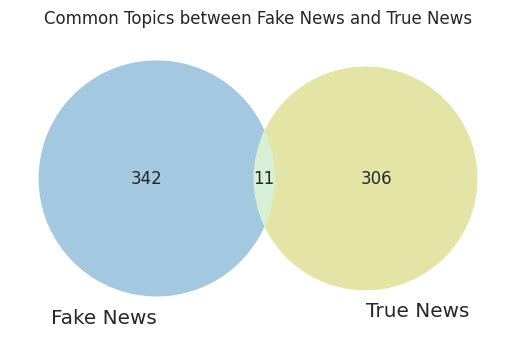

In [162]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Create sets from the lists of topics
fake_news_set = set(faketopics_list)
true_news_set = set(truetopics_list)

# Create the Venn diagram
venn2([fake_news_set, true_news_set], set_colors=('tab:blue', 'tab:olive'), set_labels=('Fake News', 'True News'))

# Save the plot as a JPEG
plt.savefig('venn.jpeg', format='jpeg')

# Add a title and show the diagram
plt.title("Common Topics between Fake News and True News")
plt.show()



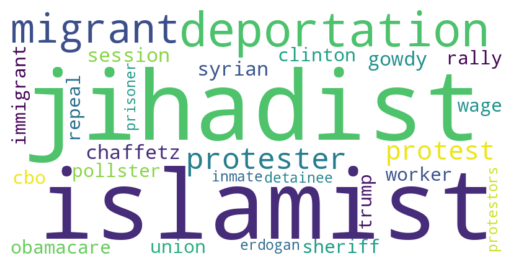

In [177]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the three lists into one list of all topics
all_topics = truetopics_list + faketopics_list + common_words

# Join the common topics into a single string
common_topics_string = " ".join(common_words)

# Create the word cloud using the WordCloud module
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(common_topics_string)

# Display the word cloud using Matplotlib
plt.imshow(wordcloud, interpolation='bilinear', cmap = 'GnBu')
plt.axis('off')

# Save the plot as a JPEG
plt.savefig('wordcloud.jpeg', format='jpeg')


plt.show()




In [ ]:
from top2vec import Top2Vec

# Set the maximum number of matching documents to return
num_docs = 43642

# Search for documents containing the given keywords
n = len(result)

for i in range(0, n):
  doc_ids, doc_scores, keywords_found = model_fake.search_documents_by_keywords(result[i], num_docs)

sum = 0
# Print the results
for doc_id, doc_score, keywords in zip(doc_ids, doc_scores, keywords_found):
    sum = sum + 1
    print(f"Document ID: {doc_id}, Score: {doc_score}, Keywords found: {keywords}")

print(sum)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Document ID: Obama’s Secret Muslim List Why enemies of Israel and Iran’s “go-to guy” appeared on the list. November 2, 2016 Daniel Greenfield 
Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
Like a warped Islamic version of Santa Claus, Obama had a secret Muslim list. And his people checked it at least twice. The list was of Muslims who were prospects for important jobs and appointments. 
It included a Muslim who had described Israel as an “Apartheid State,” Iran’s “go-to guy in New York financial circles” and a number of figures linked to the Muslim Brotherhood. 
It was the ultimate religious test from an administration that had vocally rejected them. 
Obama had claimed that having religious tests for migration was “shameful” and “not American.” 
“When I hear folks say that, well maybe we should just admit the Christians but not the Muslims,” he huffed from Turkey. His Muslim host country was run by a bigoted spon

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Document ID: We recently reported on how the far right is waging war against a dying breed: Congressional Republicans who at least attempt to be compassionate and reasonable in their policy-making. At the top of the list for these far right lunatics  antics has been Rep. Charlie Dent (R-PA), who is the co-chair of the moderate Tuesday Group in the House Republican conference. Dent has obviously been feeling the pressure from his less reasonable comrades, as he will not seek re-election in the 2018 midterms.This really isn t that surprising. Increasingly, the ultra conservative Freedom Caucus has gained power in the House Republican conference, and they and their followers have absolutely no problem ousting people who won t fall in line with their extreme far right agenda. It was this group that unseated former House Speaker Eric Cantor, and forced the most recent former House Speaker, John Boehner, to resign. So, perhaps Dent has the right idea here. He says of his decision: I ve worke

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Document ID: French President Macron is offering to expel member states from the EU. The union is falling to pieces. Thus, the talks about Georgia joining the EU are absurd and have to stop., Score: 0.11993878656263661, Keywords found: 37416
Document ID: If you don t know who Tomi Lahren is by this point, you re clearly a very fortunate person. Lahren has made her fame off trashing everything liberal despite not knowing anything of which she speaks.Barely out of college, and still green in the world, Lahren had viral videos hosted through The Blaze, but was ultimately let go because of her raging hypocrisy surrounding abortion rights. Then after months of making videos on her phone and clearly adored by Fox News propaganda artist Sean Hannity, she was ultimately added to Fox as a regular mouthpiece. Now, she s out in Hollywood, the land in which she claims to hate, going out and doing all the Hollywood things she can, and someone just caught her on camera.It looks as though she got hoo

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Document ID: 2016 presidential campaign by BAR editor and senior columnist Margaret Kimberley 
Democrats used to value things like global peace and justice in the workplace. But, for decades they have given their votes to warmongers and job-exporters. This week, they are mourning the defeat of a politician they once would have despised. In January, lots of Black Democrats will cry over the exit of a president who “won by making himself palatable to white people while also taking advantage of undeserved black pride.” Freedom Rider: Obama’s Hollow Legacy by BAR editor and senior columnist Margaret Kimberley 
“The sight of Barack and Michelle hosting a state dinner was enough to make black hearts swoon.” 
Obama’s legacy is in tatters, and that is good news. Donald Trump’s victory was not just a win over Hillary Clinton, but against Democratic Party policies that silenced the rank and file. For years Democrats became convinced that the only means of keeping Republicans at bay was to go alo

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Document ID: Alabama Republicans were quickly trying to ban all cities and counties from raising the minimum wage, but one city gave the GOP the finger and beat them to the punch.Birmingham, Alabama now has the highest minimum wage in the South after the city council voted 6-2 to make the new wage $10.10 per hour, despite Republican efforts to kill it at the state level.After the city council originally voted in August for the wage hike to gradually increase to $10.10 by July 2017, Alabama state GOP Rep. David Faulkner quickly introduced a bill to ban it from going into effect, along with banning cities and counties from trying to raise the minimum wage for their citizens in the future.It s not a surprise, frankly. After all, Republicans are more in favor of eliminating the minimum wage entirely than they are of raising it to help struggling workers and families pay the bills and put food on the table without having to rely on federal and state assistance.Indeed, Alabama currently rank

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Document ID: Trust busting used to be a national sport and now total corporate monopoly is upon us. We need a dream team - Trey Gowdy with Johnny Cochran and Barry Scheck as back up maybe..., Score: -0.07447692554071936, Keywords found: 28454
Document ID: Print 
Of all the weeks to turn in a late Follies post from your LU Football Commentary Service. 
We’ve already had two outcomes for our Inner Circle (more below, in case you’re still in suspense). 
But we’re also in a position to ask the eternal question: if Cal and USC play and no one pays attention, did anything happen? (FWIW, USC won, 45-24. Another Storied Rivalry settled for 2016. Cal ballcaps back in the closet, folks.) 
Next week: CFB rankings to lampoon. 
Tennessee whupped up on Jacksonville Thursday night in the pros. As nature seems to have intended this year. Get a defense, Jags. 
Inner circle 
The University of Tulsa Golden Hurricane (4-2), which beat Notre Dame 28-27 on 30 October 2010, will be at Memphis Saturday for an

In [98]:
from top2vec import Top2Vec

# Common topics for Fake model

# Set the maximum number of matching documents to return
num_docs = 43642

# Search for documents containing the given keywords
n = len(result)

print(n)

score_fake = []

for i in range(0, n):
    doc_ids, doc_scores, keywords_found = model_fake.search_documents_by_keywords(result[i], num_docs)
    sorted_indices = np.argsort(doc_scores)[::-1]
    sorted_doc_ids = np.array(doc_ids)[sorted_indices]
    sorted_doc_scores = np.array(doc_scores)[sorted_indices]
    sorted_keywords_found = np.array(keywords_found)[sorted_indices]

    # Calculate the score at the desired percentile (e.g., 90th percentile)
    percentile = 99
    cutoff = np.percentile(sorted_doc_scores, percentile)
    print(cutoff)
    score_fake.append(cutoff)

    # Set the threshold and print only the documents with scores above the threshold
    sum = 0
    for doc_id, doc_score, keywords in zip(sorted_doc_ids, sorted_doc_scores, sorted_keywords_found):
        if doc_score >= cutoff:
            sum += 1
            #print(f"Document ID: {doc_id}, Score: {doc_score}, Keywords found: {keywords}")
        else:
            break

    print(sum)

print(score_fake)
    

11
0.3619639911592384
437
0.40690493510988635
437
0.4179095938037698
437
0.28169045793432523
437
0.3334359924908887
437
0.15040138619443555
437
0.3538560376725688
437
0.29610682314456016
437
0.33975512385507156
437
0.3769373619614743
437
0.20452588828825877
439
[0.3619639911592384, 0.40690493510988635, 0.4179095938037698, 0.28169045793432523, 0.3334359924908887, 0.15040138619443555, 0.3538560376725688, 0.29610682314456016, 0.33975512385507156, 0.3769373619614743, 0.20452588828825877]


In [99]:
from top2vec import Top2Vec

# Common topics for Fake model

# Set the maximum number of matching documents to return
num_docs = 34975

# Search for documents containing the given keywords
n = len(result)

score_true = []

for i in range(0, n):
    doc_ids, doc_scores, keywords_found = model_true.search_documents_by_keywords(result[i], num_docs)

    sorted_indices = np.argsort(doc_scores)[::-1]
    sorted_doc_ids = np.array(doc_ids)[sorted_indices]
    sorted_doc_scores = np.array(doc_scores)[sorted_indices]
    sorted_keywords_found = np.array(keywords_found)[sorted_indices]

    # Calculate the score at the desired percentile (e.g., 90th percentile)
    percentile = 99
    cutoff = np.percentile(sorted_doc_scores, percentile)
    print(cutoff)
    score_true.append(cutoff)

    # Set the threshold and print only the documents with scores above the threshold
    sum = 0
    for doc_id, doc_score, keywords in zip(sorted_doc_ids, sorted_doc_scores, sorted_keywords_found):
        if doc_score >= cutoff:
            sum += 1
            #print(f"Document ID: {doc_id}, Score: {doc_score}, Keywords found: {keywords}")
        else:
            break

    print(sum)
print(score_true)

0.37114534141040195
350
0.415552463912292
350
0.4024584831945229
350
0.2810649240534862
350
0.2772444130880762
350
0.17088051395383413
350
0.47647079872777337
350
0.28108188392922206
350
0.37767831801306045
350
0.3015194205708015
350
0.22763133110758843
350
[0.37114534141040195, 0.415552463912292, 0.4024584831945229, 0.2810649240534862, 0.2772444130880762, 0.17088051395383413, 0.47647079872777337, 0.28108188392922206, 0.37767831801306045, 0.3015194205708015, 0.22763133110758843]


In [113]:
import matplotlib.pyplot as plt

print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

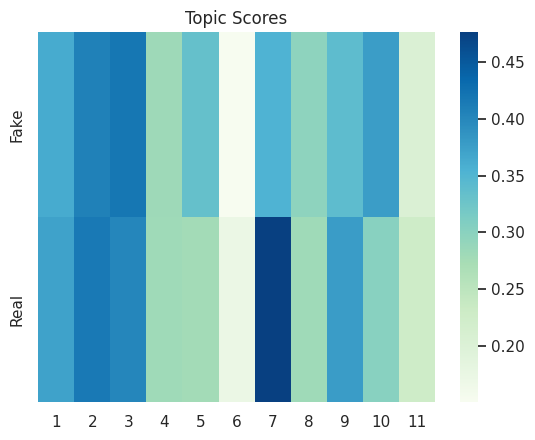

In [186]:
import pandas as pd
import seaborn as sns

common_score = [score_fake, score_true]

# Create a DataFrame with the scores for each topic
df = pd.DataFrame(data=common_score, columns=common_words)

# Create the heat map using seaborn
ax = sns.heatmap(df, annot=False, cmap = 'GnBu')

# Replace the y-axis tick labels
ax.set_yticklabels(['Fake', 'Real'])
ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,11])

plt.xticks(rotation = 0)

# Save the plot as a JPEG
plt.savefig('heatmap.jpeg', format='jpeg')

# Set the title and show the plot
plt.title("Topic Scores")
plt.show()



In [89]:
from top2vec import Top2Vec

# Common topics for True model

# Set the maximum number of matching documents to return
num_docs = 34975

# Search for documents containing the given keywords
n = len(result)

for i in range(0, n):
    doc_ids, doc_scores, keywords_found = model_true.search_documents_by_keywords(result[i], num_docs)

sorted_indices = np.argsort(doc_scores)[::-1]
sorted_doc_ids = np.array(doc_ids)[sorted_indices]
sorted_doc_scores = np.array(doc_scores)[sorted_indices]
sorted_keywords_found = np.array(keywords_found)[sorted_indices]

# Calculate the score at the desired percentile (e.g., 90th percentile)
percentile = 99
cutoff = np.percentile(sorted_doc_scores, percentile)
print(cutoff)

# Set the threshold and print only the documents with scores above the threshold
sum = 0
for doc_id, doc_score, keywords in zip(sorted_doc_ids, sorted_doc_scores, sorted_keywords_found):
    if doc_score >= cutoff:
        sum += 1
        #print(f"Document ID: {doc_id}, Score: {doc_score}, Keywords found: {keywords}")
    else:
        break

print(sum)

0.22763133110758843
350


In [ ]:
# Set the maximum number of matching documents to return
num_docs = 43642

# Search for documents containing the given keywords
n = len(result_fake)

for i in range(0, n):
    keyword = result_fake[i]
    try:
        doc_ids, doc_scores, keywords_found = model_fake.search_documents_by_keywords(keyword, num_docs)
    except ValueError:
        print(f"Skipping keyword '{keyword}' due to error")

sorted_indices = np.argsort(doc_scores)[::-1]
sorted_doc_ids = np.array(doc_ids)[sorted_indices]
sorted_doc_scores = np.array(doc_scores)[sorted_indices]
sorted_keywords_found = np.array(keywords_found)[sorted_indices]

# Calculate the score at the desired percentile (e.g., 99th percentile)
percentile = 99
cutoff = np.percentile(sorted_doc_scores, percentile)
print(cutoff)

# Set the threshold and print only the documents with scores above the threshold
sum = 0
for doc_id, doc_score, keywords in zip(sorted_doc_ids, sorted_doc_scores, sorted_keywords_found):
  if doc_score >= cutoff:
    sum += 1
    #print(f"Document ID: {doc_id}, Score: {doc_score}, Keywords found: {keywords}")
  else:
    break
print(sum)
    

Skipping keyword '['caucus', 'clinton', 'sander']' due to error
Skipping keyword '['controversy', 'transgender', 'ci']' due to error
Skipping keyword '['cub', 'harrelson', 'booed']' due to error
Skipping keyword '['state', 'californian', 'secede']' due to error


In [ ]:
from top2vec import Top2Vec

# fake topics for true model

# Set the maximum number of matching documents to return
num_docs = 34975

# Search for documents containing the given keywords
n = len(result_fake)

for i in range(0, n):
    keyword = result_fake[i]
    try:
        doc_ids, doc_scores, keywords_found = model_true.search_documents_by_keywords(keyword, num_docs)
    except ValueError:
        print(f"Skipping keyword '{keyword}' due to error")

sorted_indices = np.argsort(doc_scores)[::-1]
sorted_doc_ids = np.array(doc_ids)[sorted_indices]
sorted_doc_scores = np.array(doc_scores)[sorted_indices]
sorted_keywords_found = np.array(keywords_found)[sorted_indices]

# Calculate the score at the desired percentile (e.g., 99th percentile)
percentile = 99
cutoff = np.percentile(sorted_doc_scores, percentile)
print(cutoff)

# Set the threshold and print only the documents with scores above the threshold
sum = 0
for doc_id, doc_score, keywords in zip(sorted_doc_ids, sorted_doc_scores, sorted_keywords_found):
  if doc_score >= cutoff:
    sum += 1
    #print(f"Document ID: {doc_id}, Score: {doc_score}, Keywords found: {keywords}")
  else:
    break
print(sum)

Skipping keyword '['trump', 'clinton', 'oligarch']' due to error
Skipping keyword '['trump', 'leaker', 'oligarch']' due to error
Skipping keyword '['trump', 'trumpers', 'potus']' due to error
Skipping keyword '['trump', 'republican', 'nevertrump']' due to error
Skipping keyword '['baltic', 'warmonger', 'soviet']' due to error
Skipping keyword '['trump', 'propagandist', 'trumpers']' due to error
Skipping keyword '['ukrainian', 'separatist', 'donbas']' due to error
Skipping keyword '['economist', 'banker', 'hyperinflation']' due to error
Skipping keyword '['caucus', 'clinton', 'sander']' due to error
Skipping keyword '['antioxidant', 'vitamin', 'supplement']' due to error
Skipping keyword '['denier', 'hoax', 'scientist']' due to error
Skipping keyword '['trump', 'tweet', 'leaker']' due to error
Skipping keyword '['clinton', 'staffer', 'leaker']' due to error
Skipping keyword '['whistleblower', 'spied', 'fisa']' due to error
Skipping keyword '['trump', 'warmonger', 'neocon']' due to error

In [ ]:
from top2vec import Top2Vec

# true topics for fake model

# Set the maximum number of matching documents to return
num_docs = 43642

# Search for documents containing the given keywords
n = len(result_true)

for i in range(0, n):
    keyword = result_fake[i]
    try:
        doc_ids, doc_scores, keywords_found = model_fake.search_documents_by_keywords(keyword, num_docs)
    except ValueError:
        print(f"Skipping keyword '{keyword}' due to error")

sorted_indices = np.argsort(doc_scores)[::-1]
sorted_doc_ids = np.array(doc_ids)[sorted_indices]
sorted_doc_scores = np.array(doc_scores)[sorted_indices]
sorted_keywords_found = np.array(keywords_found)[sorted_indices]

# Calculate the score at the desired percentile (e.g., 99th percentile)
percentile = 99
cutoff = np.percentile(sorted_doc_scores, percentile)
print(cutoff)

# Set the threshold and print only the documents with scores above the threshold
sum = 0
for doc_id, doc_score, keywords in zip(sorted_doc_ids, sorted_doc_scores, sorted_keywords_found):
  if doc_score >= cutoff:
    sum += 1
    #print(f"Document ID: {doc_id}, Score: {doc_score}, Keywords found: {keywords}")
  else:
    break
print(sum)
    

Skipping keyword '['caucus', 'clinton', 'sander']' due to error
Skipping keyword '['protester', 'retweets', 'provocateur']' due to error
Skipping keyword '['transgender', 'ci', 'sex']' due to error
Skipping keyword '['cub', 'booed', 'harrelson']' due to error
0.3772431862182961
437


In [ ]:
from top2vec import Top2Vec

# true topics for true model

# Set the maximum number of matching documents to return
num_docs = 34975

# Search for documents containing the given keywords
n = len(result_true)

for i in range(0, n):
    keyword = result_fake[i]
    try:
        doc_ids, doc_scores, keywords_found = model_true.search_documents_by_keywords(keyword, num_docs)
    except ValueError:
        print(f"Skipping keyword '{keyword}' due to error")

sorted_indices = np.argsort(doc_scores)[::-1]
sorted_doc_ids = np.array(doc_ids)[sorted_indices]
sorted_doc_scores = np.array(doc_scores)[sorted_indices]
sorted_keywords_found = np.array(keywords_found)[sorted_indices]

# Calculate the score at the desired percentile (e.g., 99th percentile)
percentile = 99
cutoff = np.percentile(sorted_doc_scores, percentile)
print(cutoff)

# Set the threshold and print only the documents with scores above the threshold
sum = 0
for doc_id, doc_score, keywords in zip(sorted_doc_ids, sorted_doc_scores, sorted_keywords_found):
  if doc_score >= cutoff:
    sum += 1
    #print(f"Document ID: {doc_id}, Score: {doc_score}, Keywords found: {keywords}")
  else:
    break
print(sum)
    

Skipping keyword '['trump', 'clinton', 'oligarch']' due to error
Skipping keyword '['trump', 'leaker', 'oligarch']' due to error
Skipping keyword '['trump', 'trumpers', 'potus']' due to error
Skipping keyword '['trump', 'republican', 'nevertrump']' due to error
Skipping keyword '['baltic', 'warmonger', 'soviet']' due to error
Skipping keyword '['trump', 'propagandist', 'trumpers']' due to error
Skipping keyword '['ukrainian', 'separatist', 'donbas']' due to error
Skipping keyword '['economist', 'banker', 'hyperinflation']' due to error
Skipping keyword '['caucus', 'clinton', 'sander']' due to error
Skipping keyword '['antioxidant', 'vitamin', 'supplement']' due to error
Skipping keyword '['denier', 'hoax', 'scientist']' due to error
Skipping keyword '['trump', 'tweet', 'leaker']' due to error
Skipping keyword '['clinton', 'staffer', 'leaker']' due to error
Skipping keyword '['whistleblower', 'spied', 'fisa']' due to error
Skipping keyword '['trump', 'warmonger', 'neocon']' due to error

In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


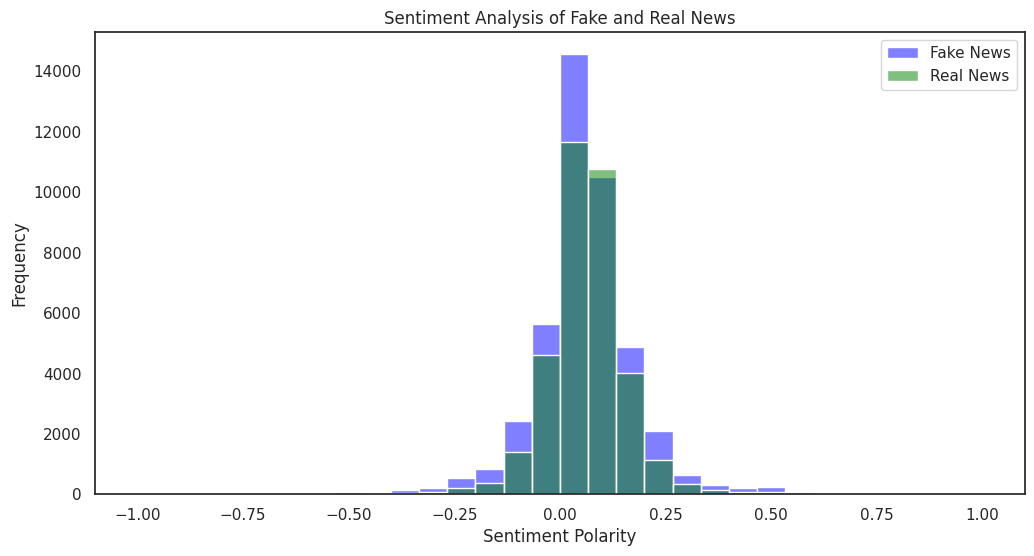

In [167]:
# Performing sentiment analysis
import pandas as pd
from textblob import TextBlob

# Load the fake and real news datasets
fake_news = pd.read_csv('drive/MyDrive/CANIS/DataSet_Misinfo_FAKE.csv')
real_news = pd.read_csv('drive/MyDrive/CANIS/DataSet_Misinfo_TRUE.csv')

# Fill in missing values with an empty string
fake_news['text'] = fake_news['text'].fillna('')
real_news['text'] = real_news['text'].fillna('')

# Calculate sentiment polarity for each news article
fake_news['sentiment'] = fake_news['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
real_news['sentiment'] = real_news['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize the sentiment distribution for both datasets
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white', palette='muted')

plt.figure(figsize=(12, 6))
sns.histplot(data=fake_news, x='sentiment', color='blue', label='Fake News', alpha=0.5, bins=30)
sns.histplot(data=real_news, x='sentiment', color='green', label='Real News', alpha=0.5, bins=30)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Fake and Real News')
plt.legend()

# Save the plot as a JPEG
plt.savefig('sentiment.jpeg', format='jpeg')

plt.show()



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
_, p_value_fake = stats.shapiro(fake_news['sentiment'])
_, p_value_real = stats.shapiro(real_news['sentiment'])

alpha = 0.05
print(f"p-value for fake news: {p_value_fake}")
print(f"p-value for real news: {p_value_real}")

if p_value_fake < alpha and p_value_real < alpha:
    print("The sentiment distributions are not normal.")
else:
    print("The sentiment distributions are normal.")


p-value for fake news: 0.0
p-value for real news: 0.0
The sentiment distributions are not normal.


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
if p_value_fake >= alpha and p_value_real >= alpha:
    _, p_value_levene = stats.levene(fake_news['sentiment'], real_news['sentiment'])
    print(f"p-value for Levene's test: {p_value_levene}")

    if p_value_levene < alpha:
        print("The variances are not equal.")
    else:
        print("The variances are equal.")


In [ ]:
if p_value_fake >= alpha and p_value_real >= alpha and p_value_levene >= alpha:
    t_stat, p_value_ttest = stats.ttest_ind(fake_news['sentiment'], real_news['sentiment'])
    print(f"p-value for t-test: {p_value_ttest}")


In [ ]:
if p_value_fake >= alpha and p_value_real >= alpha and p_value_levene >= alpha:
    t_stat, p_value_ttest = stats.ttest_ind(fake_news['sentiment'], real_news['sentiment'])
    print(f"p-value for t-test: {p_value_ttest}")


In [ ]:
if p_value_fake >= alpha and p_value_real >= alpha and p_value_levene >= alpha:
    t_stat, p_value_ttest = stats.ttest_ind(fake_news['sentiment'], real_news['sentiment'])
    print(f"p-value for t-test: {p_value_ttest}")
    test_result = p_value_ttest
else:
    u_stat, p_value_mannwhitney = stats.mannwhitneyu(fake_news['sentiment'], real_news['sentiment'])
    print(f"p-value for Mann-Whitney U test: {p_value_mannwhitney}")
    test_result = p_value_mannwhitney

if test_result < alpha:
    print("There is a significant difference in sentiment between fake and real news articles.")
else:
    print("There is no significant difference in sentiment between fake and real news articles.")


p-value for Mann-Whitney U test: 1.6425832192628284e-32
There is a significant difference in sentiment between fake and real news articles.


In [ ]:
# Performing linguistic analysis
!python -m spacy download en_core_web_sm


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-04-02 19:55:44.860209: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-02 19:55:47.067993: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 67.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
import pandas as pd

# Load the fake and real news datasets
fake_news = pd.read_csv('drive/MyDrive/CANIS/DataSet_Misinfo_FAKE.csv')
real_news = pd.read_csv('drive/MyDrive/CANIS/DataSet_Misinfo_TRUE.csv')


In [ ]:
fake_news['label'] = 'fake'
real_news['label'] = 'real'
combined_news = pd.concat([fake_news, real_news], ignore_index=True)


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk

def analyze_linguistic_features(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Part-of-speech tagging
    pos_tags = pos_tag(filtered_tokens)

    # Named entity recognition
    named_entities = ne_chunk(pos_tags)

    return {
        'tokens': tokens,
        'filtered_tokens': filtered_tokens,
        'pos_tags': pos_tags,
        'named_entities': named_entities
    }


In [ ]:
sample_news = combined_news.sample(n=50)  # Adjust n based on your requirements and computational resources
sample_news['linguistic_analysis'] = sample_news['text'].apply(analyze_linguistic_features)


In [ ]:
for index, row in sample_news.iterrows():
    print(f"{'-' * 80}\nArticle ID: {index}, Label: {row['label']}")

    print("\nTokens:")
    print(row['linguistic_analysis']['tokens'])

    print("\nFiltered Tokens (without stop words):")
    print(row['linguistic_analysis']['filtered_tokens'])

    print("\nPart-of-speech Tags:")
    print(row['linguistic_analysis']['pos_tags'])

    print("\nNamed Entities:")
    print(row['linguistic_analysis']['named_entities'])


Streaming output truncated to the last 5000 lines.
  (ORGANIZATION MSNBC/NNP)
  reported/VBD
  ,/,
  citing/VBG
  multiple/JJ
  (ORGANIZATION House/NNP)
  leadership/NN
  sources/NNS
  reported/VBD
  delay/NN
  marked/VBD
  setback/JJ
  (PERSON Trump/NNP)
  ,/,
  seeking/VBG
  first/JJ
  major/JJ
  legislative/JJ
  victory/NN
  campaigned/VBD
  promise/JJ
  repeal/JJ
  replace/VB
  President/NNP
  (PERSON Barack/NNP Obama/NNP)
  ’/NNP
  landmark/NN
  law/NN
  ./.)
--------------------------------------------------------------------------------
Article ID: 23081, Label: fake

Tokens:
['Police', 'fire', 'rubber', 'bullets', 'at', 'pipeline', 'protesters', '11/03/2016', 'KGW', 'Police', 'in', 'riot', 'gear', 'shot', 'rubber', 'bullets', 'and', 'used', 'pepper', 'spray', 'on', 'demonstrators', '—', 'who', 'call', 'themselves', 'water', 'protectors', '—', 'on', 'the', 'shoreline', 'of', 'the', 'Cantapeta', 'Creek', ',', 'just', 'north', 'of', 'the', 'Standing', 'Rock', 'Sioux', 'Indian', 'R

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [ ]:
def count_linguistic_features(linguistic_analysis):
    pos_tags = linguistic_analysis['pos_tags']
    named_entities = linguistic_analysis['named_entities']

    pos_counter = Counter(tag for _, tag in pos_tags)
    ner_counter = Counter(entity.label() for entity in named_entities if hasattr(entity, 'label'))

    return pos_counter, ner_counter


In [ ]:
sample_news[['pos_counts', 'ner_counts']] = sample_news['linguistic_analysis'].apply(count_linguistic_features).apply(pd.Series)
fake_sample_news = sample_news[sample_news['label'] == 'fake']
real_sample_news = sample_news[sample_news['label'] == 'real']


In [ ]:
fake_pos_counts = fake_sample_news['pos_counts'].sum()
real_pos_counts = real_sample_news['pos_counts'].sum()
fake_ner_counts = fake_sample_news['ner_counts'].sum()
real_ner_counts = real_sample_news['ner_counts'].sum()


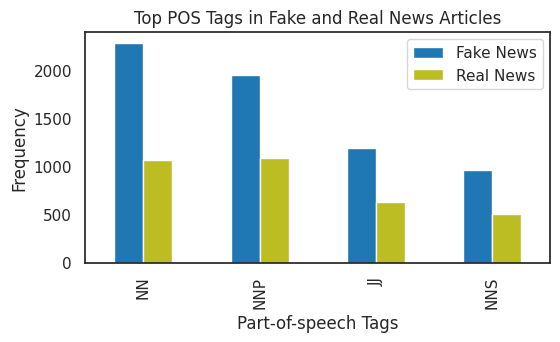

In [168]:
top_n = 4

fake_pos_df = pd.DataFrame(fake_pos_counts.most_common(top_n), columns=['POS', 'Fake News'])
real_pos_df = pd.DataFrame(real_pos_counts.most_common(top_n), columns=['POS', 'Real News'])
pos_df = fake_pos_df.merge(real_pos_df, on='POS')

sns.set(style='white')
pos_df.plot(x='POS', y=['Fake News', 'Real News'], kind='bar', figsize=(6, 3), color = ['tab:blue', 'tab:olive'])
plt.xlabel('Part-of-speech Tags')
plt.ylabel('Frequency')
plt.title('Top POS Tags in Fake and Real News Articles')

# Save the plot as a JPEG
plt.savefig('linguistic.jpeg', format='jpeg')

plt.show()



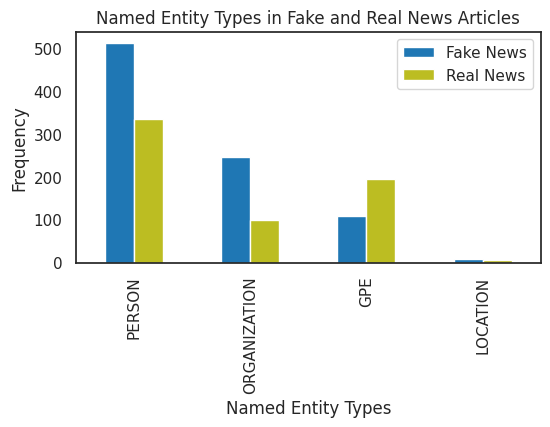

In [169]:
fake_ner_df = pd.DataFrame(fake_ner_counts.most_common(5), columns=['NER', 'Fake News'])
real_ner_df = pd.DataFrame(real_ner_counts.most_common(5), columns=['NER', 'Real News'])
ner_df = fake_ner_df.merge(real_ner_df, on='NER')

ner_df.plot(x='NER', y=['Fake News', 'Real News'], kind='bar', figsize=(6, 3), color = ['tab:blue', 'tab:olive'])
plt.xlabel('Named Entity Types')
plt.ylabel('Frequency')
plt.title('Named Entity Types in Fake and Real News Articles')

plt.savefig('linguistic2.jpeg', format='jpeg')

plt.show()

